In [8]:
#Primero importamos las libreías que nos van a hacer falta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from datetime import datetime, timedelta

In [2]:
#Después nos traemos el archivo de datos
df = pd.read_excel(r'C:\Users\Usuario\Desktop\Programación\Proyecto Análisis de Datos Entrenos\nuevaapp\Datos.xlsx')

In [3]:
# Encontrar el valor máximo en la columna 'columna_ejemplo'
valor_maximo = df['Peso (kg)'].max()

# Encontrar el índice de la fila que contiene el valor máximo
indice_valor_maximo = df['Peso (kg)'].idxmax()

# Eliminar la fila con el valor máximo
df = df.drop(indice_valor_maximo)

In [4]:
# Calcular estadísticas básicas por ejercicio
estadisticas_basicas_por_ejercicio = df.groupby('Ejercicio').describe().round(2)

# Eliminar la columna 'count'
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop([('Unnamed: 0', 'count')], axis=1)

# Transponer el MultiIndex para mostrar las estadísticas básicas en función del ejercicio
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.stack(0).unstack(0)

# Eliminar la fila 'Unnamed: 0'
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop('Unnamed: 0', axis=0)

#Eliminar columna count
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop('count', axis=1)

# Visualizar las estadísticas básicas por ejercicio
display(estadisticas_basicas_por_ejercicio)

25%                           \
Ejercicio              CMJ FREE ARMS DOMINADAS PRESS DE BANCA   
Peso (kg)                      84.00     84.00          55.00   
VMP (m/s)                       1.69      0.68           0.57   
Velocidad máxima (m/s)          2.49      1.03           0.74   
nº Rep                          1.00      2.00           2.00   
nº Serie                        1.00      1.00           1.00   

                                                                          50%  \
Ejercicio              SENTADILLA BARRA ALTA SENTADILLA FRONTAL CMJ FREE ARMS   
Peso (kg)                              60.00              52.50         84.00   
VMP (m/s)                               0.69               0.59          1.81   
Velocidad máxima (m/s)                  1.50               1.26          2.63   
nº Rep                                  1.00               1.00          1.00   
nº Serie                                2.00               1.25          2.00   

                                                                       \
Ejercicio              DOMINADAS PRESS DE BANCA SENTADILLA BARRA ALTA   
Peso (kg)                  84.00          60.00                 80.00   
VMP (m/s)                   0.74           0.67                  0.80   
Velocidad máxima (m/s)      1.15           0.86                  1.63   
nº Rep                      3.00           3.00                  1.00   
nº Serie                    2.00           2.00                  4.00   

                                           ...           min            \
Ejercicio              SENTADILLA FRONTAL  ... CMJ FREE ARMS DOMINADAS   
Peso (kg)                           65.00  ...         84.00     84.00   
VMP (m/s)                            0.69  ...          0.53      0.50   
Velocidad máxima (m/s)               1.40  ...          1.15      0.77   
nº Rep                               2.00  ...          1.00      1.00   
nº Serie                             2.00  ...          1.00      1.00   

                                                             \
Ejercicio              PRESS DE BANCA SENTADILLA BARRA ALTA   
Peso (kg)                       20.00                 20.00   
VMP (m/s)                        0.31                  0.49   
Velocidad máxima (m/s)           0.44                  1.23   
nº Rep                           1.00                  1.00   
nº Serie                         1.00                  1.00   

                                                    std            \
Ejercicio              SENTADILLA FRONTAL CMJ FREE ARMS DOMINADAS   
Peso (kg)                           20.00          0.84      0.48   
VMP (m/s)                            0.33          0.36      0.08   
Velocidad máxima (m/s)               0.80          0.37      0.16   
nº Rep                               1.00          0.21      1.62   
nº Serie                             1.00          1.00      1.16   

                                                                                
Ejercicio              PRESS DE BANCA SENTADILLA BARRA ALTA SENTADILLA FRONTAL  
Peso (kg)                       10.80                 27.23              14.01  
VMP (m/s)                        0.24                  0.27               0.17  
Velocidad máxima (m/s)           0.31                  0.30               0.22  
nº Rep                           2.39                  0.72               1.08  
nº Serie                         1.17                  3.18               1.29  

[5 rows x 35 columns]

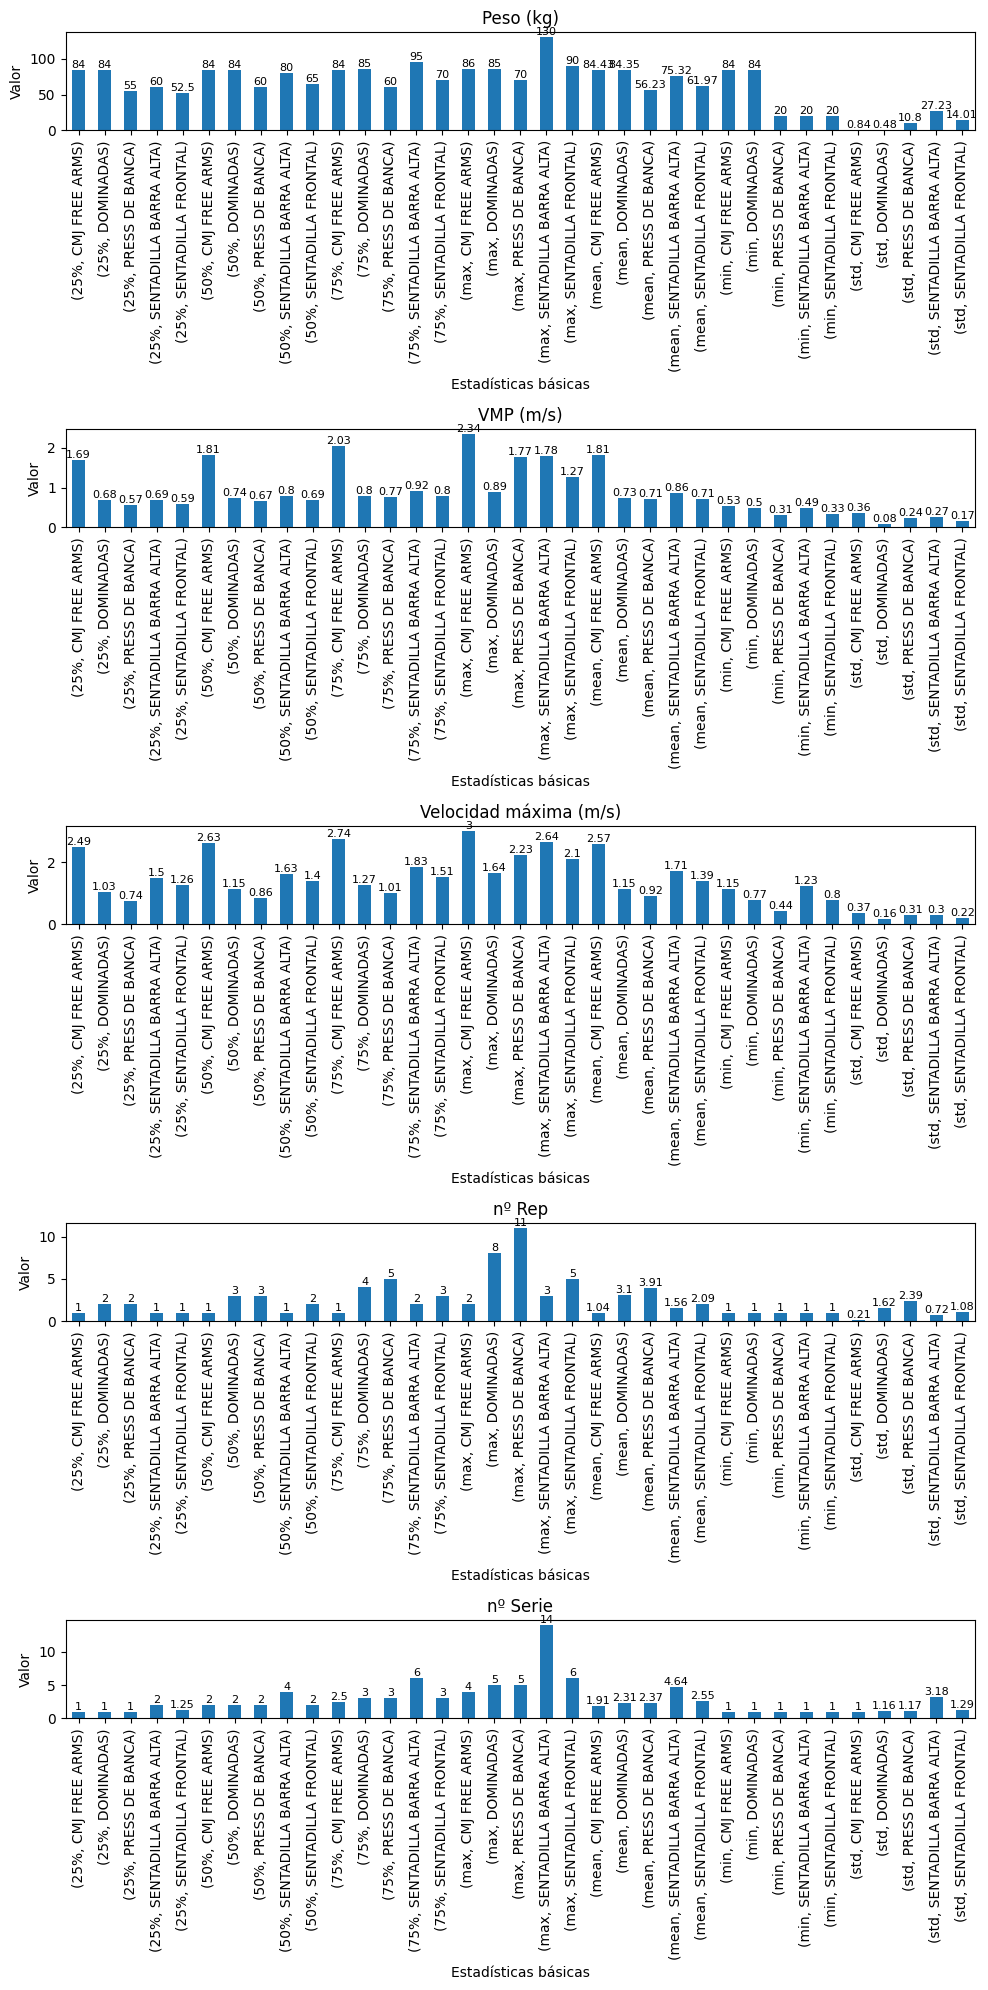

In [5]:
# Transponer el DataFrame para facilitar la creación de gráficos de barras apiladas
estadisticas_transpuestas = estadisticas_basicas_por_ejercicio.transpose()

# Crear gráficos de barras apiladas para cada columna en función del ejercicio
fig, axes = plt.subplots(nrows=len(estadisticas_transpuestas.columns), figsize=(10, len(estadisticas_transpuestas.columns) * 4))
for idx, (column, ax) in enumerate(zip(estadisticas_transpuestas.columns, axes)):
    barras = estadisticas_transpuestas[column].plot.bar(stacked=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Valor')
    ax.set_xlabel('Estadísticas básicas')
    
    # Anotar valores en cada barra
    for bar in barras.containers:
        ax.bar_label(bar, label_type='edge', fontsize=8)
    
plt.tight_layout()
plt.show()

Ejercicios disponibles:
1. CMJ FREE ARMS
2. DOMINADAS
3. PRESS DE BANCA
4. SENTADILLA FRONTAL
5. SENTADILLA BARRA ALTA

Estadísticas básicas para PRESS DE BANCA:


,Unnamed: 0,nº Serie,Peso (kg),nº Rep,VMP (m/s),Velocidad máxima (m/s)
count,232.00,232.00,232.00,232.00,232.00,232.00
mean,263.50,2.37,56.23,3.91,0.71,0.92
std,67.12,1.17,10.80,2.39,0.24,0.31
min,148.00,1.00,20.00,1.00,0.31,0.44
25%,205.75,1.00,55.00,2.00,0.57,0.74
50%,263.50,2.00,60.00,3.00,0.67,0.86
75%,321.25,3.00,60.00,5.00,0.77,1.01
max,379.00,5.00,70.00,11.00,1.77,2.23


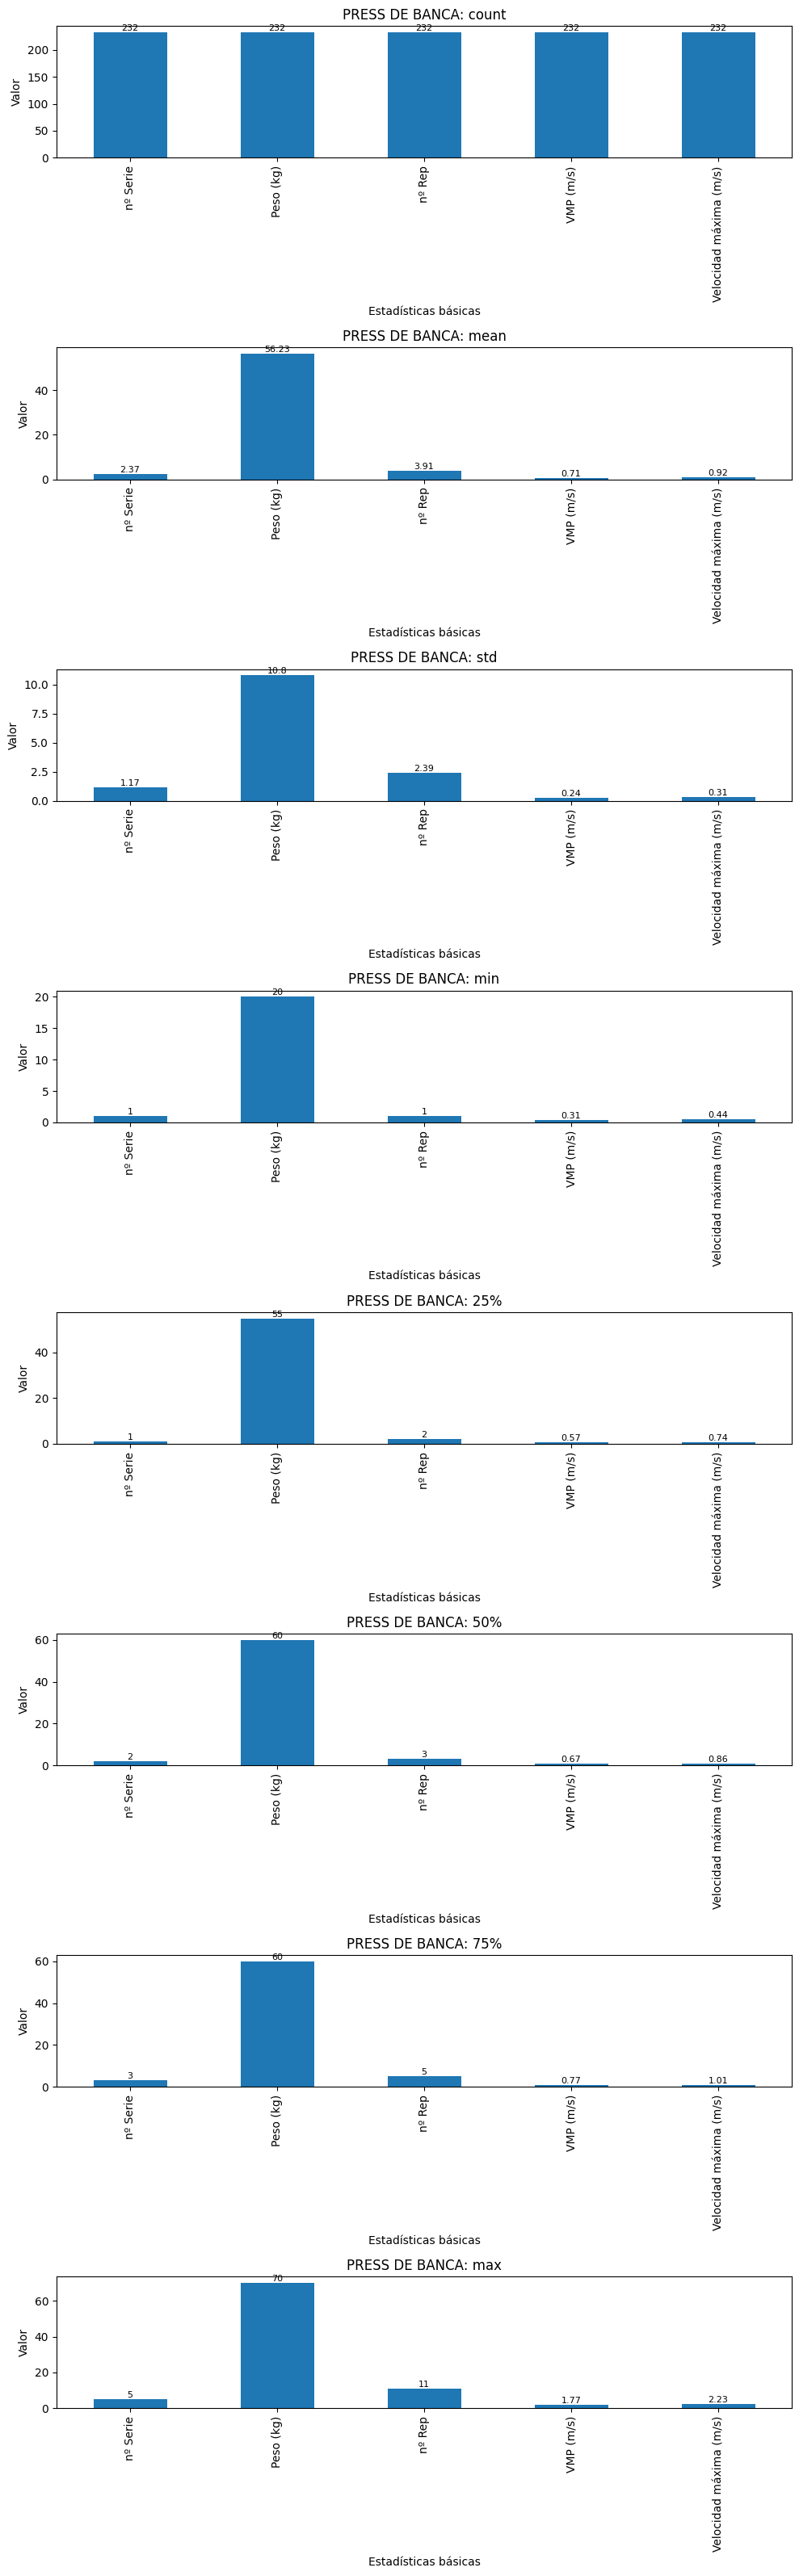

In [6]:
def mostrar_analisis_descriptivo_por_ejercicio(dataframe):
    # Obtener la lista de ejercicios únicos en el DataFrame
    ejercicios = dataframe['Ejercicio'].unique()
    
    # Solicitar al usuario que elija un ejercicio
    print("Ejercicios disponibles:")
    for i, ejercicio in enumerate(ejercicios):
        print(f"{i + 1}. {ejercicio}")
    seleccion = int(input("Introduce el número del ejercicio que deseas analizar: "))
    ejercicio_seleccionado = ejercicios[seleccion - 1]
    
    # Filtrar el DataFrame por el ejercicio seleccionado
    df_filtrado = dataframe[dataframe['Ejercicio'] == ejercicio_seleccionado]
    
    # Calcular estadísticas básicas para el ejercicio seleccionado
    estadisticas_basicas = df_filtrado.describe().round(2)
    
    # Mostrar las estadísticas básicas
    print(f"\nEstadísticas básicas para {ejercicio_seleccionado}:")
    display(estadisticas_basicas)
    
    # Crear gráficos de barras apiladas para cada columna en función del ejercicio
    estadisticas_basicas = estadisticas_basicas.drop('Unnamed: 0', axis=1)
    estadisticas_transpuestas = estadisticas_basicas.transpose()

    fig, axes = plt.subplots(nrows=len(estadisticas_transpuestas.columns), figsize=(10, len(estadisticas_transpuestas.columns) * 4))
    for idx, (column, ax) in enumerate(zip(estadisticas_transpuestas.columns, axes)):
        barras = estadisticas_transpuestas[column].plot.bar(stacked=True, ax=ax)
        ax.set_title(f"{ejercicio_seleccionado}: {column}")
        ax.set_ylabel('Valor')
        ax.set_xlabel('Estadísticas básicas')
        
        # Anotar valores en cada barra
        for bar in barras.containers:
            ax.bar_label(bar, label_type='edge', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función para mostrar el análisis descriptivo por ejercicio
mostrar_analisis_descriptivo_por_ejercicio(df)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Cargar el DataFrame
df = pd.read_excel(r'C:\Users\Usuario\Desktop\Programación\Proyecto Análisis de Datos Entrenos\nuevaapp\Datos.xlsx')

# Calcular la fatiga para cada serie
df['Fatiga'] = (df['VMP (m/s)'].groupby([df['Ejercicio'], df['Fecha'], df['nº Serie']]).transform('max') - df['VMP (m/s)']) / df['VMP (m/s)'].groupby([df['Ejercicio'], df['Fecha'], df['nº Serie']]).transform('max')
df['Fatiga'] = df['Fatiga'] * 100

# Calcular la máxima fatiga de cada día agrupada por ejercicio
max_fatiga_por_dia_y_ejercicio = df.groupby(['Ejercicio', 'Fecha'])['Fatiga'].max().reset_index()

# Mostrar los ejercicios disponibles
ejercicios_disponibles = df['Ejercicio'].unique()
print("Ejercicios disponibles para analizar:")
for idx, ejercicio in enumerate(ejercicios_disponibles):
    print(f"{idx + 1}. {ejercicio}")

# Pedir al usuario que elija el ejercicio y el rango de tiempo
ejercicio_elegido = input("Por favor, ingresa el ejercicio que deseas analizar: ")
rango_tiempo = input("Elige un rango de tiempo: [ultimo_dia, ultima_semana, ultimo_mes, todo]: ")

# Filtrar el DataFrame según la elección del usuario
hoy = datetime.today()
if rango_tiempo == 'ultimo_dia':
    fecha_inicio = hoy - timedelta(days=1)
elif rango_tiempo == 'ultima_semana':
    fecha_inicio = hoy - timedelta(weeks=1)
elif rango_tiempo == 'ultimo_mes':
    fecha_inicio = hoy - timedelta(days=30)
else:
    fecha_inicio = df['Fecha'].min()

datos_filtrados = max_fatiga_por_dia_y_ejercicio[(max_fatiga_por_dia_y_ejercicio['Ejercicio'] == ejercicio_elegido) & (max_fatiga_por_dia_y_ejercicio['Fecha'] >= fecha_inicio)]

# Crear un gráfico de barras para visualizar la máxima fatiga por día según la elección del usuario
plt.figure(figsize=(10, 5))
sns.barplot(x='Fecha', y='Fatiga', data=datos_filtrados)
plt.title(f'Máxima fatiga por día para {ejercicio_elegido} en el rango de tiempo: {rango_tiempo}')
plt.xlabel('Fecha')
plt.ylabel('Fatiga (%)')
plt.xticks(rotation=45)
plt.show()

Ejercicios disponibles para analizar:
1. CMJ FREE ARMS
2. DOMINADAS
3. PRESS DE BANCA
4. SENTADILLA FRONTAL
5. SENTADILLA BARRA ALTA


ValueError: min() arg is an empty sequence

<Figure size 1000x500 with 0 Axes>